# Analyses based on assortativity

In [1]:
import glob
import itertools
import pickle
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.lines import Line2D
from tqdm import tqdm

sys.path.append("../scripts/")


from utils_draw import (
    compute_fig_lims,
    plot_frame,
    plot_graph,
    plot_graphx,
    plot_masks,
    plot_orientations,
    plot_presence,
    plot_trajectories,
    calculate_window_widths, 
    plot_time_series_by_window,
    plot_series_distribution,
    plot_convex_hull,
    plot_time_series_by_window_fill_between
)
from utils_networks import *

sb.set_theme(style="ticks", context="paper")


results_dir = "../results/assortativity/"
data_dir = "../data/pre-birth/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

%load_ext autoreload
%autoreload 2

## Load data

### Load segmentation files

In [2]:
clean_seg_files = glob.glob("../data/*cleaned.pkl")
clean_seg_files = sorted(clean_seg_files)
clean_seg_files

['../data/1688827433752_cleaned.pkl',
 '../data/1688827660979_cleaned.pkl',
 '../data/1688827887072_cleaned.pkl',
 '../data/1688828965144_cleaned.pkl',
 '../data/1688829151574_cleaned.pkl',
 '../data/1688829193016_cleaned.pkl',
 '../data/1688830733272_cleaned.pkl',
 '../data/1688830960531_cleaned.pkl',
 '../data/1688831187858_cleaned.pkl',
 '../data/1688831228731_cleaned.pkl',
 '../data/1688831374924_cleaned.pkl',
 '../data/1688831602631_cleaned.pkl',
 '../data/1688831830406_cleaned.pkl',
 '../data/1688832540499_cleaned.pkl',
 '../data/1688832767759_cleaned.pkl',
 '../data/1688832995052_cleaned.pkl',
 '../data/1688841618482_1_cleaned.pkl',
 '../data/1688841618482_2_cleaned.pkl']

In [3]:
vid_numbers = [file_name.split("/")[-1][:-12] for file_name in clean_seg_files]
vid_numbers

['1688827433752',
 '1688827660979',
 '1688827887072',
 '1688828965144',
 '1688829151574',
 '1688829193016',
 '1688830733272',
 '1688830960531',
 '1688831187858',
 '1688831228731',
 '1688831374924',
 '1688831602631',
 '1688831830406',
 '1688832540499',
 '1688832767759',
 '1688832995052',
 '1688841618482_1',
 '1688841618482_2']

In [4]:
data_files = glob.glob("../data/*/1688*.hdf5")
data_files

['../data/late/1688841618482_segmentations_max_names.hdf5',
 '../data/pre-birth/1688830733272_segmentations_max_merges.hdf5',
 '../data/pre-birth/1688827660979_segmentations.hdf5',
 '../data/pre-birth/1688829151574_segmentations.hdf5',
 '../data/pre-birth/1688830960531_segmentations_198backup.hdf5',
 '../data/pre-birth/1688827433752_segmentations.hdf5',
 '../data/pre-birth/1688828965144_segmentations.hdf5',
 '../data/pre-birth/1688829193016_segmentations.hdf5',
 '../data/pre-birth/1688827887072_segmentations.hdf5',
 '../data/post-birth/1688832767759_segmentations.hdf5',
 '../data/post-birth/1688831830406_segmentations.hdf5',
 '../data/post-birth/1688832540499_segmentations.hdf5',
 '../data/post-birth/1688832995052_segmentations_max_merges.hdf5',
 '../data/post-birth/1688831602631_segmentations.hdf5',
 '../data/during-birth/1688831228731_segmentations_postUpgradeFormat.hdf5',
 '../data/during-birth/1688831187858_segmentations_postUpgradeFormat.hdf5',
 '../data/during-birth/1688831374924

In [5]:
import pickle 

segmentations = {}

for vid_number in vid_numbers:

    file_name = f"../data/{vid_number}_cleaned.pkl"
    with open(file_name, "rb") as fp:
        segmentation = pickle.load(fp)

        segmentations[vid_number] = segmentation

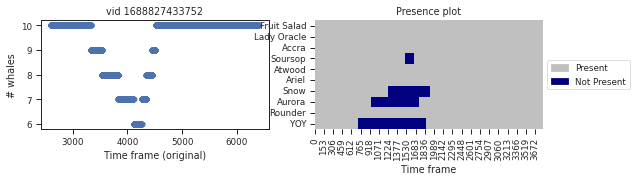

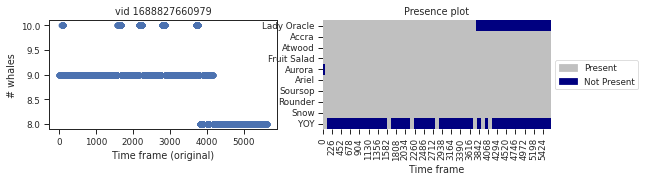

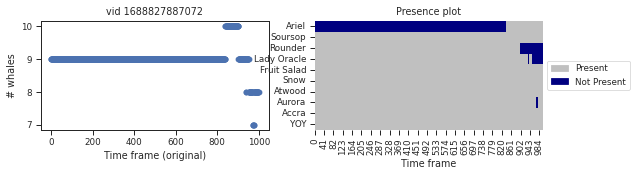

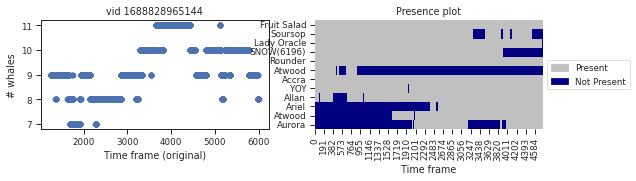

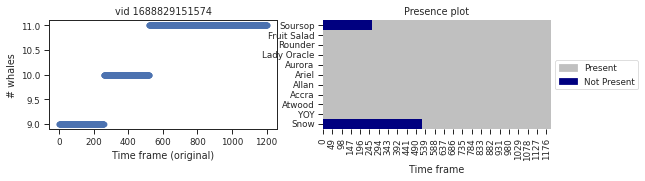

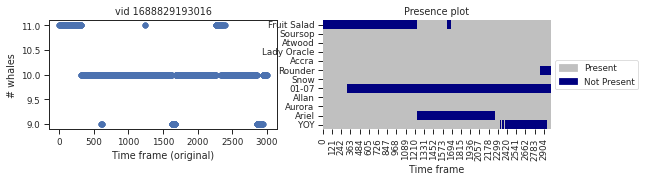

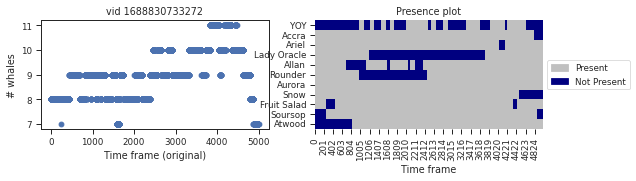

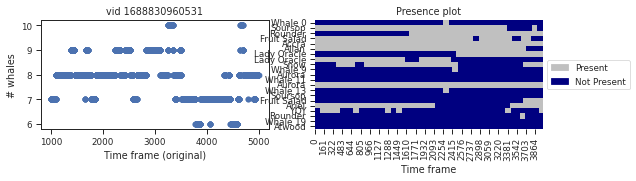

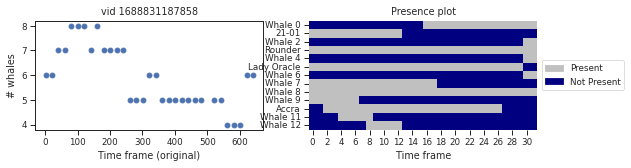

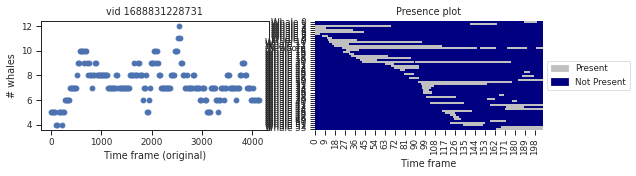

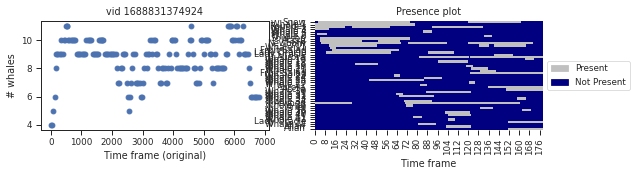

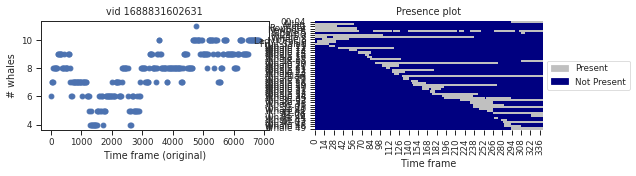

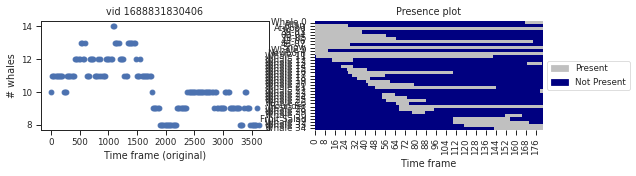

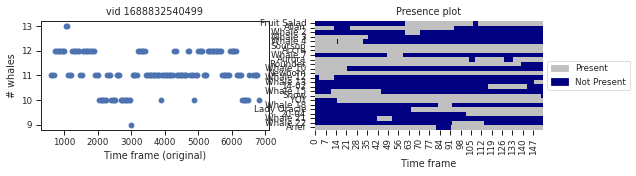

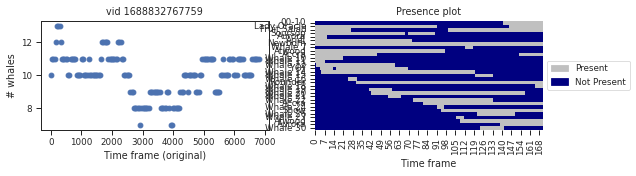

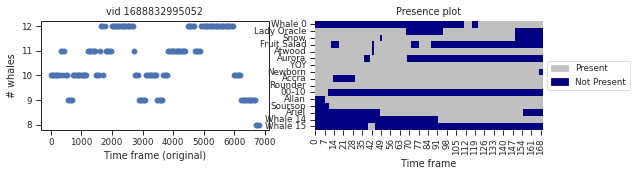

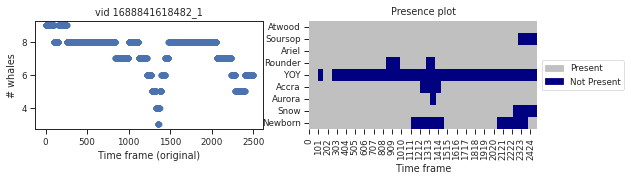

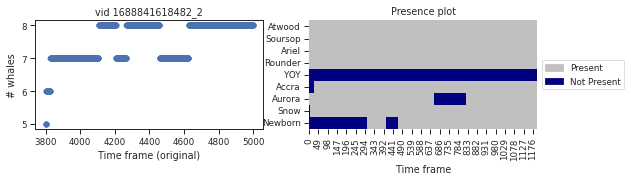

In [6]:
for vid_number in vid_numbers:

    seg = segmentations[vid_number]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 2))
    
    ax1.plot(seg["frame_indices"], seg["num_whales_over_time"], 'o')
    ax1.set_ylabel("# whales")
    ax1.set_xlabel("Time frame (original)")
    ax1.set_title(f"vid {vid_number}")

    plot_presence(seg, ax=ax2)

plt.show()


### Load distance matrices

In [7]:
#with open('../data/adjacencies_centroid_dist_avg.pkl', 'rb') as fp:
#    adjacencies_centroid_avg = pickle.load(fp)

#with open('../data/adjacencies_centroid_dist.pkl', 'rb') as fp:
#    adjacencies_centroid = pickle.load(fp)

file_name = f"../results/adjacency_matrices_contact.pkl"
with open(file_name, "rb") as fp:
    adjacencies_contact = pickle.load(fp)

file_name = f"../results/adjacency_matrices_mask_dist.pkl"
with open(file_name, "rb") as fp:
    adjacencies_mask_dist = pickle.load(fp)



In [8]:
adj_mask_dist_avg = {}

for vid_number in vid_numbers :
    adj = adjacencies_mask_dist[vid_number]
    #adj[adj == np.inf] = np.nan
    adj_mask_dist_avg[vid_number] = np.nanmean(adj, axis=0)

/tmp/ipykernel_65021/236080841.py:6: RuntimeWarning: Mean of empty slice
  adj_mask_dist_avg[vid_number] = np.nanmean(adj, axis=0)


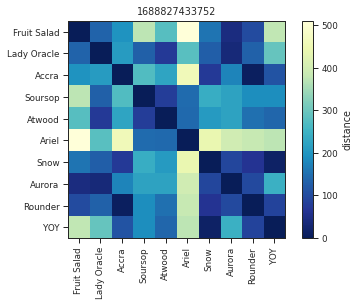

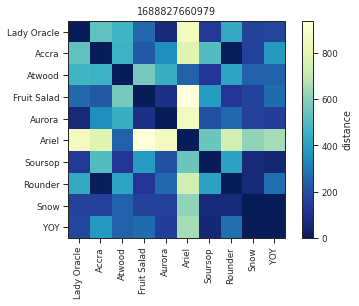

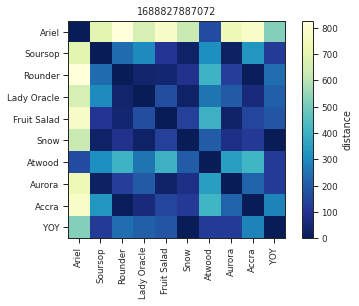

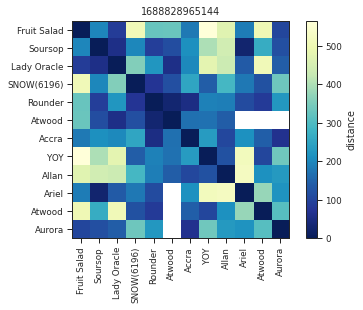

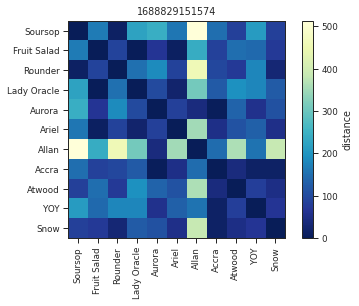

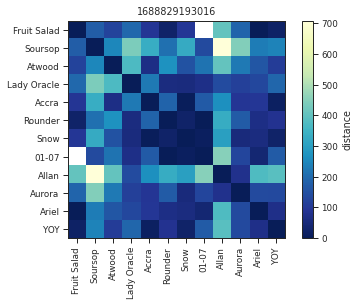

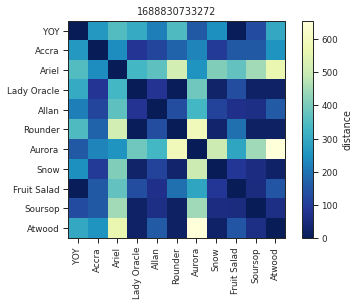

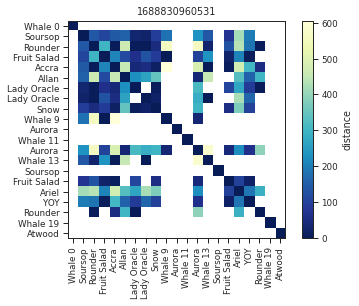

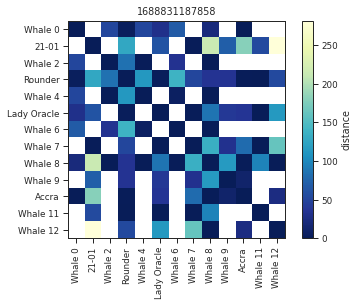

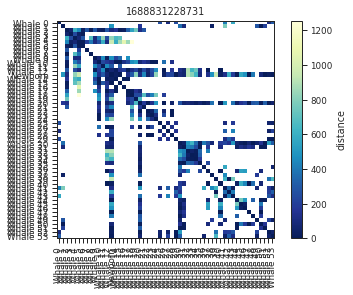

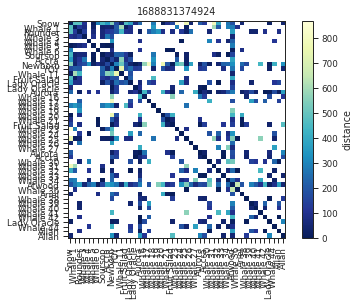

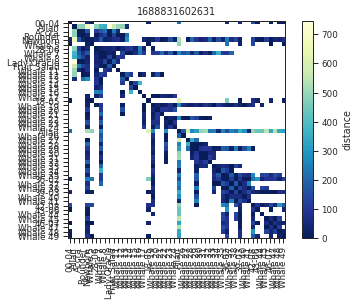

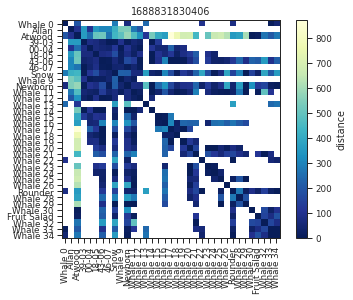

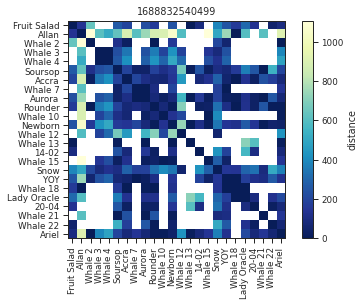

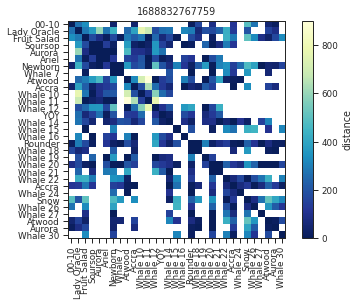

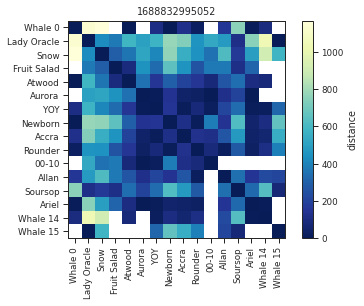

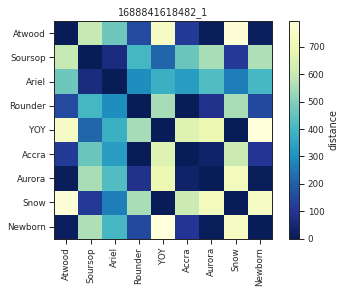

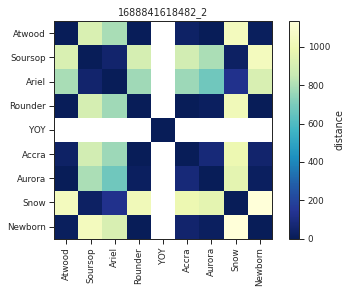

In [9]:
for vid_number in vid_numbers:

    #adj_centroid_avg = adjacencies_contact[vid_number]
    adj = adj_mask_dist_avg[vid_number]
    seg = segmentations[vid_number]

    fig, ax = plt.subplots()
    
    im = ax.imshow(adj, cmap="YlGnBu_r")
    plt.colorbar(im, label="distance")
    
    labels = np.array(seg["ids"])
    
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels, rotation=0)

    ax.set_title(vid_number)
    
plt.show()

### Define whale attributes

In [10]:
from collections import defaultdict

all_named_whales = ["Atwood", "Lady Oracle", "Rounder", "Allan", "Aurora", "Accra", "Newborn", "Fruit Salad", 
                    "Soursop", "Snow", "Ariel", "YOY"]

family_members = {"left" : ["Atwood", "Lady Oracle", "Rounder", "Allan", "Aurora", "Accra", "Newborn"],
                  "right" : ["Fruit Salad", "Soursop", "Snow", "Ariel", "YOY"]}

age_members = {"calf" : ["Accra", "Newborn", "Ariel", "YOY"],
              "adult" : ["Rounder", "Allan", "Aurora", "Lady Oracle", "Atwood", "Fruit Salad", "Soursop", "Snow"]}

family_membership = defaultdict(lambda: None)
age_membership = defaultdict(lambda: None)

for family, members in family_members.items():
    for member in members:
        family_membership[member] = family

for adult, members in age_members.items():
    for member in members:
        age_membership[member] = adult

#family_membership = {member : family for family, members in family_members.items() for member in members}
family_membership

defaultdict(<function __main__.<lambda>()>,
            {'Atwood': 'left',
             'Lady Oracle': 'left',
             'Rounder': 'left',
             'Allan': 'left',
             'Aurora': 'left',
             'Accra': 'left',
             'Newborn': 'left',
             'Fruit Salad': 'right',
             'Soursop': 'right',
             'Snow': 'right',
             'Ariel': 'right',
             'YOY': 'right'})

In [11]:
sorted(all_named_whales)

['Accra',
 'Allan',
 'Ariel',
 'Atwood',
 'Aurora',
 'Fruit Salad',
 'Lady Oracle',
 'Newborn',
 'Rounder',
 'Snow',
 'Soursop',
 'YOY']

### Load video times 

In [12]:
df_metadata = pd.read_csv("../data/videos_metadata.csv", sep="\t")
keep = ["video_number", "start", "end"]
df_metadata = df_metadata[keep]
df_metadata

,video_number,start,end
0,1688826012514,10:20:13,10:21:47
1,1688827433752,10:43:54,10:47:41
2,1688827660979,10:47:41,10:50:49
3,1688827876972,10:51:23,10:53:24
4,1688827887072,10:51:27,10:53:23
5,1688828965144,11:09:25,11:12:50
6,1688829151574,11:12:37,11:13:17
7,1688829190202,11:13:11,11:16:04
8,1688829193016,11:13:19,11:16:05
9,1688830671491,11:37:53,11:38:09


In [13]:
from datetime import time

birth_start = time(11, 12, 45)
birth_end = time(11, 45, 45)
later = time(14, 0, 0)

def assign_period(t):
    if t < birth_start:
        return "pre"
    elif birth_start <= t and t < birth_end:
        return "during"
    elif birth_end <= t and t < later:
        return "post"
    elif t >= later:
        return "late"


In [14]:
# Define functions for extracting birth regions.
def assign_birth_regions(x):
    if (x <= -33*60):
        return "pre"
    elif  (-33*60 <= x) & (x <= 0):
        return "during"
    elif (0 <= x) & (x <= 60*(2*60+15)):
        return "post"
    elif (x >= 60*(2*60+15)):
        return "late"


In [15]:
timestamps_s = {}
timestamps_s_babyTime = {}
timestamps_str = {}

for vid_number in vid_numbers:

    seg = segmentations[vid_number]

    timestamps_s[vid_number] = seg["timestamps_s"]
    timestamps_s_babyTime[vid_number] = seg["timestamps_s_babyTime"]
    timestamps_str[vid_number] = seg["timestamps_str"]

In [16]:
df_timestamps_s = pd.DataFrame.from_dict(timestamps_s, orient='index')
df_timestamps_s_babyTime = pd.DataFrame.from_dict(timestamps_s_babyTime, orient='index')
df_timestamps_str = pd.DataFrame.from_dict(timestamps_str, orient='index')

df_timestamps_long = df_timestamps_s.melt(ignore_index=False, var_name="frame", value_name="timestamps_s")
df_timestamps_s_babyTime_long = df_timestamps_s_babyTime.melt(ignore_index=False, var_name="frame", value_name="timestamps_s_babyTime")
df_timestamps_str_long = df_timestamps_str.melt(ignore_index=False, var_name="frame", value_name="timestamps_str")


df_timestamps_s_babyTime_long = df_timestamps_s_babyTime_long.reset_index().rename(columns={"index": "vid_number"})

df_timestamps_s_babyTime_long.sort_values(by=["vid_number", "frame"])


,vid_number,frame,timestamps_s_babyTime
0,1688827433752,0,-3623.69641
18,1688827433752,1,-3623.66341
36,1688827433752,2,-3623.62941
54,1688827433752,3,-3623.59541
72,1688827433752,4,-3623.56341
...,...,...,...
101213,1688841618482_2,5622,NaN
101231,1688841618482_2,5623,NaN
101249,1688841618482_2,5624,NaN
101267,1688841618482_2,5625,NaN


### Function for attribute shuffling

In [17]:
# Function to shuffle and compute assortativity for all combinations
def compute_shuffled_assortativity(G, attribute):
    # Get the original attribute values
    original_values = [G.nodes[node][attribute] for node in G.nodes()]

    #print(original_values)
    
    # Get all permutations of the attribute values
    permutations = itertools.permutations(original_values)
    
    #return 
    
    # Set to store assortativity results to avoid duplicate computations
    assortativity_results = []

    #print()
    #print(list(set(list(permutations))))
    permutations = list(set(list(permutations)))
    #print(len(list(permutations)))
    #return
    #print(list(permutations))
    
    for perm in permutations:
        #print(perm)
        # Assign the shuffled attributes to the nodes
        for idx, node in enumerate(G.nodes()):
            G.nodes[node][attribute] = perm[idx]
        
        # Compute the assortativity for the current permutation
        assortativity = nx_adjusted_assortativity(G, attribute) #nx.attribute_assortativity_coefficient(G, attribute)
        assortativity_results.append(assortativity)
    
    return assortativity_results

In [18]:
def num_attribute_shufflings(G, attribute):
    # Get the original attribute values
    original_values = [G.nodes[node][attribute] for node in G.nodes()]
    
    # Get all permutations of the attribute values
    permutations = itertools.permutations(original_values)
    permutations = list(set(list(permutations)))

    return len(permutations)
    

### adapted formulas

In [19]:
def nx_adjusted_assortativity(nx_graph, attribute):
    import networkx as nx
    counts, unique = nx_group_fraction(nx_graph, attribute)
    group_map = dict([(unique[i], i) for i in range(len(unique))])

    absolute_mixing_matrix = nx.attribute_mixing_matrix(
        nx_graph, attribute, normalized=True, mapping=group_map)

    counts = counts / np.sum(counts)

    e_line = counts * counts.reshape(len(unique), 1) #- np.diag(counts)
    #print(f"eline")
    #print(f"{e_line}")

    absolute_mixing_matrix = np.divide(absolute_mixing_matrix, e_line)
    absolute_mixing_matrix /= absolute_mixing_matrix.sum()

    sum_ai_bi = np.sum(absolute_mixing_matrix.sum(axis=0) * absolute_mixing_matrix.sum(axis=1))
    sum_eii = np.sum(absolute_mixing_matrix.diagonal())
    adjusted_assortativity = (sum_eii - sum_ai_bi) / (1 - sum_ai_bi)
    return adjusted_assortativity


def nx_group_fraction(nx_graph, attribute):
    nodes_group = [nx_graph.nodes[n][attribute] for n in nx_graph.nodes]
    unique, counts = np.unique(nodes_group, return_counts=True)
    counts, unique = list(zip(*sorted(zip(counts, unique))))
    counts = np.array(counts)
    return counts, unique


def gt_adjusted_assortativity(gt_graph, group_memberships):
    import graph_tool.all as gt
    membership_property = _node_groups(gt_graph, group_memberships)
    unique, counts = np.unique(group_memberships, return_counts=True)
    m, _ = gt.corr_hist(gt_graph, membership_property, membership_property)
    m = np.divide(m, counts.reshape(2, 1)*counts)
    m /= m.sum()
    sum_ai_bi = np.sum(m.sum(axis=0)*m.sum(axis=1))
    sum_eii = np.sum(m.diagonal())
    return (sum_eii - sum_ai_bi)/(1 - sum_ai_bi)


def gt_assortativity(g, group_memberships):
    import graph_tool.all as gt
    return gt.assortativity(g, _node_groups(g, group_memberships))


def _node_groups(g, group_memberships):
    vertex_group = g.new_vertex_property('int')
    for m, v in zip(group_memberships, g.vertices()):
        vertex_group[g.vertex(v)] = m
    return vertex_group

In [20]:
def plot_attributes(G, named_ids, labels_age, labels_family, show_isolates=True) : 

    # label nodes with names
    mapping = {i: named_ids[i] for i in range(len(named_ids))}
    G = nx.relabel_nodes(G, mapping)
    
    # assign attributes to the nodes
    ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G, ages, 'age')
    
    families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G, families, 'family')
    
    # purely for visualisation
    #
    
    colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G.nodes}
    colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G.nodes}
    
    # compute assortativity
    assort_family = nx_adjusted_assortativity(G, "family")
    assort_age = nx_adjusted_assortativity(G, "age")
    print(f"age: {assort_age:.2f}")
    print(f"family: {assort_family:.2f}")

    if not show_isolates:
        G.remove_nodes_from(list(nx.isolates(G)))

        colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G.nodes}
        colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G.nodes}
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
    
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, node_color=colors_age.values(), ax=ax1, pos=pos)
    sb.despine(bottom=True, left=True)
    ax1.set_title(f"age {assort_age:.2f}")
    
    nx.draw_networkx(G, node_color=colors_family.values(), ax=ax2, pos=pos)
    sb.despine(bottom=True, left=True)
    ax2.set_title(f"family {assort_family:.2f}")
    
    plt.suptitle(f"vid {vid_number}", weight="bold")

    return (ax1, ax2)



### Load whale sizes

In [21]:
file_name = f"../results/whale_sizes.pkl"
with open(file_name, "rb") as fp:
    whale_sizes = pickle.load(fp)

In [22]:
def build_net_from_mask_dist(dist_mat, threshold, node_mapping):

    adj_bin = dist_mat.copy()
    adj_bin[adj_bin < threshold] = 1
    adj_bin[adj_bin >= threshold] = 0
    adj_bin[np.isnan(adj_bin)] = 0 # networkx doesn't accept nans in adj
    np.fill_diagonal(adj_bin, 0)

    G = nx.Graph(adj_bin)
    G = nx.relabel_nodes(G, node_mapping)
    G.remove_edges_from(nx.selfloop_edges(G))

    return G
    

## Assortativity single video

In [23]:
vid_numbers

['1688827433752',
 '1688827660979',
 '1688827887072',
 '1688828965144',
 '1688829151574',
 '1688829193016',
 '1688830733272',
 '1688830960531',
 '1688831187858',
 '1688831228731',
 '1688831374924',
 '1688831602631',
 '1688831830406',
 '1688832540499',
 '1688832767759',
 '1688832995052',
 '1688841618482_1',
 '1688841618482_2']

In [24]:
vid_number = "1688841618482_1"

seg = segmentations[vid_number]
adj_dist_avg = adjacencies_centroid_avg[vid_number].copy()
ids = seg["ids"]

#adj_avg[np.isnan(adj_avg)] = adj_avg.max() * 1

# keep only identified named whales
named_ids_mask = np.array([True if i in all_named_whales else False for i in ids ])
named_ids = list(np.array(ids)[named_ids_mask])
adj_dist_avg = adj_dist_avg[:,named_ids_mask][named_ids_mask,:]

labels_family = [None if i not in seg["ids"] else family_membership[i] for i in named_ids]
labels_age = [None if i not in seg["ids"] else age_membership[i] for i in named_ids]


NameError: name 'adjacencies_centroid_avg' is not defined

In [ ]:
# threshold network (binary needed for assortativity)

threshold = np.percentile(adj_dist_avg, 50) #0.9 * np.median(adj_dist_avg)
print(threshold)

adj_bin = adj_dist_avg.copy()
adj_bin[adj_bin < threshold] = 1
adj_bin[adj_bin >= threshold] = 0
adj_bin[np.isnan(adj_bin)] = 0 # networkx doesn't accept nans in adj
np.fill_diagonal(adj_bin, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

sb.heatmap(adj_dist_avg, square=True, xticklabels=named_ids, yticklabels=named_ids, ax=ax1, cmap="Blues_r")
ax1.set_title("distance matrix")

sb.heatmap(adj_bin, square=True, xticklabels=named_ids, yticklabels=named_ids, ax=ax2, cmap="Greys")
ax2.set_title("binary link when dist < threshold")

sb.clustermap(adj_dist_avg, square=True, xticklabels=named_ids, yticklabels=named_ids, figsize=(4, 4), cmap="Blues_r")


In [ ]:
labels_age

In [230]:
families

{'YOY': 'right',
 'Accra': 'left',
 'Ariel': 'right',
 'Lady Oracle': 'left',
 'Allan': 'left',
 'Rounder': 'left',
 'Aurora': 'left',
 'Snow': 'right',
 'Fruit Salad': 'right',
 'Soursop': 'right',
 'Atwood': 'left'}

age: -0.39
family: 1.00


Text(0.5, 0.98, 'vid 1688841618482')

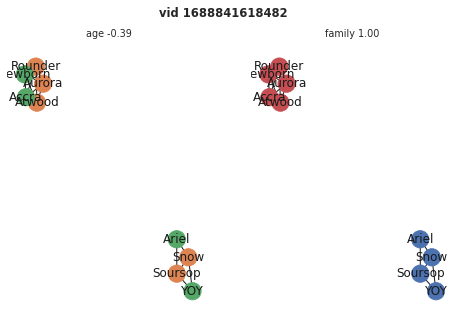

In [231]:
# create network from adj dist
G = nx.Graph(adj_bin)
# label nodes with names
mapping = {i: named_ids[i] for i in range(len(named_ids))}
G = nx.relabel_nodes(G, mapping)


# assign attributes to the nodes
ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
nx.set_node_attributes(G, ages, 'age')

families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
nx.set_node_attributes(G, families, 'family')

# purely for visualisation
G.remove_nodes_from(list(nx.isolates(G)))

colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G.nodes}
colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G.nodes}


# compute assortativity
assort_family = nx.attribute_assortativity_coefficient(G, "family")
assort_age = nx.attribute_assortativity_coefficient(G, "age")
print(f"age: {assort_age:.2f}")
print(f"family: {assort_family:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

pos = nx.spring_layout(G)
nx.draw_networkx(G, node_color=colors_age.values(), ax=ax1, pos=pos)
sb.despine(bottom=True, left=True)
ax1.set_title(f"age {assort_age:.2f}")

nx.draw_networkx(G, node_color=colors_family.values(), ax=ax2, pos=pos)
sb.despine(bottom=True, left=True)
ax2.set_title(f"family {assort_family:.2f}")

plt.suptitle(f"vid {vid_number}", weight="bold")



In [222]:
colors_age

{'YOY': 'C2',
 'Accra': 'C2',
 'Lady Oracle': 'C1',
 'Allan': 'C1',
 'Rounder': 'C1',
 'Snow': 'C1',
 'Fruit Salad': 'C1',
 'Soursop': 'C1',
 'Atwood': 'C1'}

In [83]:
G.nodes["Aurora"]

{'age': 'adult', 'family': 'left'}

## Single video over time

In [24]:
vid_numbers

['1688827433752',
 '1688827660979',
 '1688827887072',
 '1688828965144',
 '1688829151574',
 '1688829193016',
 '1688830733272',
 '1688830960531',
 '1688831187858',
 '1688831228731',
 '1688831374924',
 '1688831602631',
 '1688831830406',
 '1688832540499',
 '1688832767759',
 '1688832995052',
 '1688841618482_1',
 '1688841618482_2']

In [25]:
# load video segmentation and matrices

vid_number = "1688831374924"

seg = segmentations[vid_number]
adj_dist_avg = adj_mask_dist_avg[vid_number].copy() #adjacencies_centroid_avg[vid_number].copy()
ids = seg["ids"]

len(seg["timestamps_s_babyTime"])

179

In [25]:
adj_dist_time = adjacencies_mask_dist[vid_number].copy()
print(adj_dist_time.shape)

# keep only identified named whales
named_ids_mask = np.array([True if i in all_named_whales else False for i in ids ])
named_ids = list(np.array(ids)[named_ids_mask])
adj_dist_time = adj_dist_time[:, :,named_ids_mask][:, named_ids_mask,:]

# list of labels for identified whales
labels_family = [None if i not in seg["ids"] else family_membership[i] for i in named_ids]
labels_age = [None if i not in seg["ids"] else age_membership[i] for i in named_ids]

# note that there can still be nans in the dist matrix, for times when a whale is absent


(179, 47, 47)


In [26]:
named_ids

['Snow',
 'Rounder',
 'Soursop',
 'Accra',
 'Newborn',
 'YOY',
 'Fruit Salad',
 'Lady Oracle',
 'Lady Oracle',
 'Aurora',
 'Fruit Salad',
 'Aurora',
 'Accra',
 'Atwood',
 'Ariel',
 'Lady Oracle',
 'Allan',
 'Allan']

In [27]:
adj_dist_time.shape

(179, 18, 18)

663.0377835868671

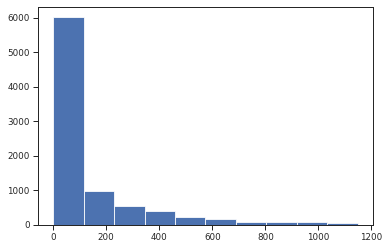

In [28]:
plt.hist(np.ravel(adj_dist_time))

#np.nanpercentile(np.ravel(adj_dist_time), 90)

whale_sizes[vid_number]["max"] * 0.8

In [29]:
# define threshold based on all times
threshold = whale_sizes[vid_number]["max"] * 0.5 #np.nanpercentile(adj_dist_time, 90)
print(f"threshold: {threshold}")

assorts_family = np.zeros(seg["num_frames"])
assorts_age = np.zeros(seg["num_frames"])

Gts = []

for t in range(seg["num_frames"]):

    adj_dist = adj_dist_time[t] # distance matrix from mask distance
    mapping = {i: named_ids[i] for i in range(len(named_ids))} # node name mapping
    
    G_t = build_net_from_mask_dist(adj_dist, threshold, mapping)
    #print(G_t.nodes)
    
    # assign attributes to the nodes
    ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G_t, ages, 'age')
    
    families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G_t, families, 'family')
    
    # purely for visualisation
    #G_t.remove_nodes_from(list(nx.isolates(G_t)))
    
    colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G_t.nodes}
    colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G_t.nodes}
     
    # compute assortativity
    assort_family = nx.attribute_assortativity_coefficient(G_t, "family") # nx_adjusted_assortativity(G_t, "family")
    assort_age = nx.attribute_assortativity_coefficient(G_t, "age")

    assorts_family[t] = assort_family
    assorts_age[t] = assort_age

    Gts.append(G_t)

    print(t)
    print(f"age: {assort_age:.2f}")
    print(f"family: {assort_family:.2f}")
        

threshold: 414.39861474179196
0
age: nan
family: nan
1
age: nan
family: nan
2
age: nan
family: nan
3
age: nan
family: -0.50
4
age: -0.20
family: -0.35
5
age: -0.20
family: -0.20
6
age: -0.20
family: -0.20
7
age: -0.20
family: -0.20
8
age: -0.20
family: -0.20
9
age: -0.17
family: -0.17
10
age: -0.19
family: -0.19
11
age: -0.14
family: -0.14
12
age: -0.10
family: -0.17
13
age: -0.11
family: -0.11
14
age: -0.13
family: -0.10
15
age: -0.11
family: -0.13
16
age: -0.13
family: -0.16
17
age: -0.18
family: -0.10
18
age: -0.10
family: -0.12
19
age: -0.14
family: -0.10
20
age: -0.09
family: -0.05
21
age: -0.13
family: 0.00
22
age: -0.18
family: -0.09
23
age: -0.16
family: -0.04
24
age: -0.18
family: -0.09
25
age: -0.31
family: -0.18
26
age: -0.31
family: -0.07
27
age: -0.30
family: -0.19
28
age: -0.31
family: -0.07
29
age: -0.21
family: -0.05
30
age: -0.18
family: -0.17
31
age: -0.08
family: -0.24
32
age: -0.20
family: -0.20
33
age: -0.22
family: -0.32
34
age: -0.22
family: -0.32
35
age: -0.16
f

/home/lucasm/.pyenv/versions/3.9.19/envs/venv_ceti/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:278: RuntimeWarning: invalid value encountered in scalar divide
  r = (t - s) / (1 - s)


In [30]:
mapping

{0: 'Snow',
 1: 'Rounder',
 2: 'Soursop',
 3: 'Accra',
 4: 'Newborn',
 5: 'YOY',
 6: 'Fruit Salad',
 7: 'Lady Oracle',
 8: 'Lady Oracle',
 9: 'Aurora',
 10: 'Fruit Salad',
 11: 'Aurora',
 12: 'Accra',
 13: 'Atwood',
 14: 'Ariel',
 15: 'Lady Oracle',
 16: 'Allan',
 17: 'Allan'}

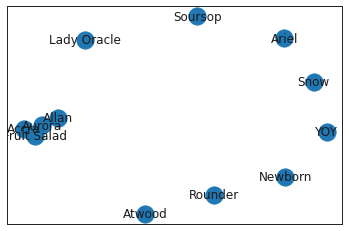

In [31]:
nx.draw_networkx(G_t)

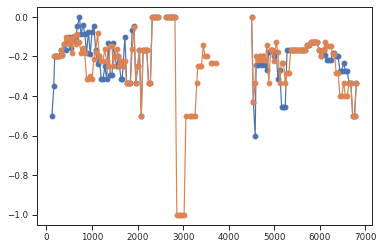

In [32]:
plt.plot(seg["frame_indices"], assorts_family, "o-")
plt.plot(seg["frame_indices"], assorts_age, "o-")

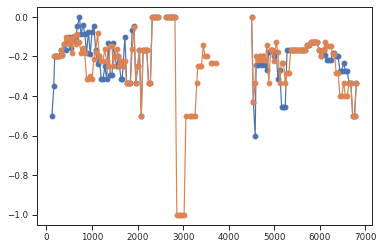

In [33]:
plt.plot(seg["frame_indices"], assorts_family, "o-")
plt.plot(seg["frame_indices"], assorts_age, "o-")

age: -0.57
family: -0.34


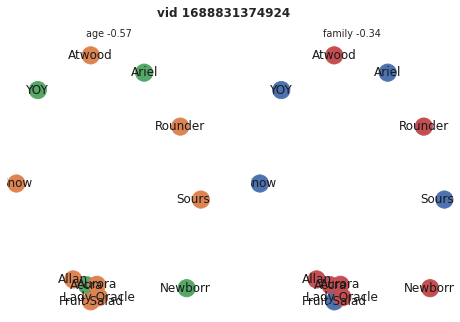

In [34]:
G_t = Gts[-10]

plot_attributes(G_t, named_ids, labels_age, labels_family, show_isolates=True)
plt.show()

In [36]:
nx.attribute_assortativity_coefficient(G_t, "age")

-0.4

In [225]:
G_t.nodes

NodeView(('Allan', 'Accra', 'Rounder', 'Lady Oracle', 'Fruit Salad'))

In [212]:
nx_adjusted_assortativity(G_t, "age")

nan

In [213]:
G_t.nodes

NodeView(('Allan', 'Accra', 'Rounder', 'Lady Oracle', 'Fruit Salad'))

In [214]:
colors_age.values()

dict_values(['C1', 'C2', 'C1', 'C1', 'C1'])

In [215]:
dd = nx.get_node_attributes(G_t, 'family')
import itertools

## All videos

In [37]:
assortivities_age = {}
assortivities_family = {}

for vid_number in vid_numbers:

    if vid_number != "1688831374924":
        continue

    # get segmentation and adjacency matrix
    seg = segmentations[vid_number]
    adj_dist_avg = adjacencies_centroid_avg[vid_number].copy()
    ids = seg["ids"]
    
    #adj_avg[np.isnan(adj_avg)] = adj_avg.max() * 1
    
    # keep only identified named whales
    named_ids_mask = np.array([True if i in all_named_whales else False for i in ids ])
    named_ids = list(np.array(ids)[named_ids_mask])
    if len(named_ids_mask)!= len(adj_dist_avg):
        print(f"video: {vid_number}: non matching shapes because duplicate names")
        assortivities_age[vid_number] = np.nan
        assortivities_family[vid_number] = np.nan  
        continue
    adj_dist_avg = adj_dist_avg[:,named_ids_mask][named_ids_mask,:]

    print(f"# ids : {len(named_ids)}")
    
    labels_family = [None if i not in seg["ids"] else family_membership[i] for i in named_ids]
    labels_age = [None if i not in seg["ids"] else age_membership[i] for i in named_ids]

    if len(adj_dist_avg)==0:
        assortivities_age[vid_number] = np.nan
        assortivities_family[vid_number] = np.nan  
        continue
        
    # threshold network (binary needed for assortativity)
    threshold = np.percentile(adj_dist_avg, 50) #0.9 * np.median(adj_dist_avg)
    print(f"dist threshold {threshold:.2f}")
    
    adj_bin = adj_dist_avg.copy()
    adj_bin[adj_bin < threshold] = 1
    adj_bin[adj_bin >= threshold] = 0
    adj_bin[np.isnan(adj_bin)] = 0 # networkx doesn't accept nans in adj
    np.fill_diagonal(adj_bin, 0)

    # create network from adj dist
    G = nx.Graph(adj_bin)
    # label nodes with names
    mapping = {i: named_ids[i] for i in range(len(named_ids))}
    G = nx.relabel_nodes(G, mapping)
    
    #G.remove_nodes_from(list(nx.isolates(G)))
    
    # assign attributes to the nodes
    ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G, ages, 'age')
    
    families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G, families, 'family')

    # compute assortativity
    
    assort_family = nx.attribute_assortativity_coefficient(G, "family")
    assort_age = nx.attribute_assortativity_coefficient(G, "age")
    print(vid_number)
    print(f"age: {assort_age:.2f}")
    print(f"family: {assort_family:.2f}")
    print()

    assortivities_age[vid_number] = assort_age
    assortivities_family[vid_number] = assort_family

NameError: name 'adjacencies_centroid_avg' is not defined

In [137]:
pd.Series(assortivities_family)

1688827433752   -0.500000
1688827660979   -0.500000
1688827887072         NaN
1688829151574   -0.411765
1688829193016   -0.371429
1688830733272   -0.085217
1688830960531         NaN
1688831187858    0.000000
1688831228731    0.000000
1688831374924         NaN
1688831602631         NaN
1688831830406         NaN
1688832540499   -0.076923
1688832767759   -0.102757
1688832995052   -0.098901
1688841618482    1.000000
dtype: float64

In [142]:
df_assort = pd.DataFrame.from_dict(assortivities_age, orient="index") 
df_assort["assort_family"] = pd.Series(assortivities_family)
df_assort = df_assort.reset_index()
df_assort.columns = ["vid_number", "assort_age", "assort_family"]

df_assort

,vid_number,assort_age,assort_family
0,1688827433752,-0.500000,-0.500000
1,1688827660979,-0.142857,-0.500000
2,1688827887072,NaN,NaN
3,1688829151574,-0.174825,-0.411765
4,1688829193016,-0.371429,-0.371429
5,1688830733272,-0.170732,-0.085217
6,1688830960531,NaN,NaN
7,1688831187858,0.000000,0.000000
8,1688831228731,0.000000,0.000000
9,1688831374924,NaN,NaN


,video_number,start,end
0,1688826012514,10:20:13,10:21:47
1,1688827433752,10:43:54,10:47:41
2,1688827660979,10:47:41,10:50:49
3,1688827876972,10:51:23,10:53:24
4,1688827887072,10:51:27,10:53:23
5,1688828965144,11:09:25,11:12:50
6,1688829151574,11:12:37,11:13:17
7,1688829190202,11:13:11,11:16:04
8,1688829193016,11:13:19,11:16:05
9,1688830671491,11:37:53,11:38:09


In [148]:
df_summary = pd.merge(left=df_assort, right=df_metadata, left_on="vid_number", right_on="video_number", how="left")
df_summary['start'] = pd.to_datetime(df_summary['start'], format='%H:%M:%S').dt.time

df_summary["when"] = df_summary["start"].apply(assign_period)
df_summary

,vid_number,assort_age,assort_family,video_number,start,end,when
0,1688827433752,-0.500000,-0.500000,1688827433752,10:43:54,10:47:41,pre
1,1688827660979,-0.142857,-0.500000,1688827660979,10:47:41,10:50:49,pre
2,1688827887072,NaN,NaN,1688827887072,10:51:27,10:53:23,pre
3,1688829151574,-0.174825,-0.411765,1688829151574,11:12:37,11:13:17,pre
4,1688829193016,-0.371429,-0.371429,1688829193016,11:13:19,11:16:05,during
5,1688830733272,-0.170732,-0.085217,1688830733272,11:38:55,11:42:42,during
6,1688830960531,NaN,NaN,1688830960531,11:42:42,11:46:29,during
7,1688831187858,0.000000,0.000000,1688831187858,11:46:29,11:46:51,post
8,1688831228731,0.000000,0.000000,1688831228731,11:47:10,11:49:28,post
9,1688831374924,NaN,NaN,1688831374924,11:49:37,11:53:24,post


In [2]:
df_long = df_summary.melt(
    value_vars=["assort_age", "assort_family"],
    id_vars=["vid_number", "start", "end", "when"],
    var_name="assort_type",
    value_name="assort",
)

NameError: name 'df_summary' is not defined

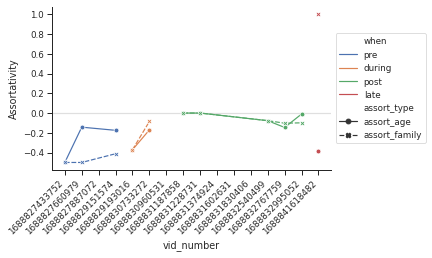

In [179]:
fig, ax = plt.subplots(figsize=(5, 3))

im = sb.lineplot(data=df_long, x="vid_number", y="assort", hue="when", markers=True, style="assort_type")

plt.xticks(rotation=45, ha="right")

ax.axhline(0, c='silver', ls="-", zorder=-2, alpha=0.5)

ax.set_ylabel("Assortativity")

sb.despine()

sb.move_legend(im, loc="center left", bbox_to_anchor=(1, 0.5))
T
fig_name = f"assortativity_time"
plt.savefig(f"{results_dir}{fig_name}.png", dpi=250, bbox_inches="tight", facecolor="w")

plt.show()

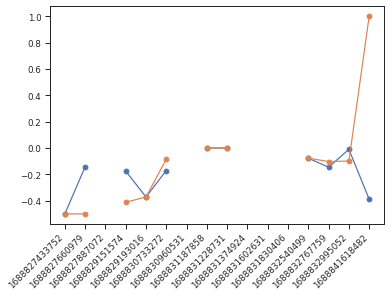

In [122]:
fig, ax = plt.subplots()

ax.plot(vid_numbers, assortivities_age.values(), "o-")
ax.plot(vid_numbers, assortivities_family.values(), "o-")

plt.xticks(rotation=45, ha="right")

plt.show()

## All videos over time

In [24]:
def compute_window(seg, window_goal):

    seg_freq = seg["segmentation_frequency"]
    vals, counts = np.unique(np.diff(seg["frame_indices"]), return_counts=True)

    # compute window size based on variable segmentation freq
    if len(vals)==1: # single segmentation freq in vid
        freq = vals[0]
    elif min(counts) < 20: # the second segmentation freq is very rare
        freq = vals[np.argmax(counts)]
        print("most frequent sampling freq", freq)
    else: # there are more segmentation freqs
        freq = min(seg_freq)
        print("more than 1 sampling freq")
        
    window = int(window_goal / freq)

    return window

In [94]:
assortivities_age = {}
assortivities_family = {}

assortivities_age_shuffled = {}
assortivities_family_shuffled = {}

window_goal = 320 * 2 #160 # in consecutive frames
print(f"running window in seconds: {window_goal / 30}")

for vid_number in vid_numbers:

    print()
    print(f"------{vid_number}")

    #if (vid_number != "1688831374924"): # and (vid_number != "1688829193016"):
    #    continue

    # get segmentation and adjacency matrix
    seg = segmentations[vid_number]
    ids = seg["ids"]
    seg_freq = seg["segmentation_frequency"]
    
    #adj_dist_avg = adj_mask_dist_avg[vid_number].copy()
    adj_dist_time = adjacencies_mask_dist[vid_number].copy()
    
    # keep only identified named whales
    named_ids_mask = np.array([True if i in all_named_whales else False for i in ids ])
    named_ids = list(np.array(ids)[named_ids_mask])
    print(f"# ids : {len(named_ids)}")
    

    # check for problematic videos
    if len(named_ids_mask)!= adj_dist_time.shape[1]:
        print(f"non matching shapes because duplicate names")
        assortivities_age[vid_number] = np.nan
        assortivities_family[vid_number] = np.nan  
        continue

    if len(named_ids)==0:
        assortivities_age[vid_number] = np.nan
        assortivities_family[vid_number] = np.nan  
        print(f"no identified whales")
        continue    

    # keep only identified named whales
    adj_dist_time = adj_dist_time[:, :,named_ids_mask][:, named_ids_mask,:]

    # whale labels
    labels_family = [None if i not in seg["ids"] else family_membership[i] for i in named_ids]
    labels_age = [None if i not in seg["ids"] else age_membership[i] for i in named_ids]

    # define distance threshold based on all times in a video
    threshold = whale_sizes[vid_number]["max"] * 0.6 # np.nanpercentile(adj_dist_time, 90)
    print(f"threshold: {threshold:.2f}")

    # prepare variables to store results
    assorts_family = np.zeros(seg["num_frames"])
    assorts_age = np.zeros(seg["num_frames"])

    assorts_age_shuffled = [] #np.zeros(seg["num_frames"]) #[]
    assorts_family_shuffled = [] #np.zeros(seg["num_frames"]) #[]

    # compute window for smoothing
    window = compute_window(seg, window_goal)

    print(f"# frames: {seg['num_frames']}")
    print(f"size window: {window}")
    print(f"# frames to shuffle: {seg['num_frames'] / window}")
    

    if vid_number=="1688828965144": # many frames segmented, too slow
        print("== don't SKIP ==")
        #continue 

    if vid_number=="1688832995052": # many frames segmented, too slow
        print("== don't SKIP ==")
        #continue

    if vid_number=="1688831374924": # many frames segmented, too slow
        print("== don't SKIP ==")
        #continue

    for t in tqdm(range(seg["num_frames"])):

        adj_dist = adj_dist_time[t] # distance matrix from mask distance
        mapping = {i: named_ids[i] for i in range(len(named_ids))} # node name mapping

        G_t = build_net_from_mask_dist(adj_dist, threshold, mapping)

        # assign attributes to the nodes
        ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
        nx.set_node_attributes(G_t, ages, 'age')
        
        families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
        nx.set_node_attributes(G_t, families, 'family')

        #if t==0:
        #    print(f"# shuffles / frame : {num_attribute_shufflings(G_t, 'family')}")
        
        # purely for visualisation
        #G_t.remove_nodes_from(list(nx.isolates(G_t)))
        
        #colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G_t.nodes}
        #colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G_t.nodes}
        
        # compute assortativity
        assort_family = nx_adjusted_assortativity(G_t, "family")
        assort_age = nx_adjusted_assortativity(G_t, "age")

        assorts_family[t] = assort_family
        assorts_age[t] = assort_age

        if t % window == 0:  # look at one point every window points, otherwise too long
            # compute null model by shuffling labels
            assort_age_shuffled = [9, 3] #compute_shuffled_assortativity(G_t, "age")
            assort_family_shuffled = [9, 3] #compute_shuffled_assortativity(G_t, "family")

            assorts_family_shuffled.append(assort_family_shuffled)
            assorts_age_shuffled.append(assort_age_shuffled)
        else: 
            
            assorts_family_shuffled.append([np.nan])
            assorts_age_shuffled.append([np.nan])
            
    print(len(assorts_family_shuffled))
    
        #print(t)
        #print(f"age: {assort_age:.2f}")
        #print(f"family: {assort_family:.2f}")

    # smooth with rolling mean
    min_periods = int(window / 4)
    assorts_age = pd.Series(assorts_age).rolling(window=window, min_periods=min_periods).mean()
    assorts_family = pd.Series(assorts_family).rolling(window=window,  min_periods=min_periods).mean()

    assortivities_age[vid_number] = assorts_age    
    assortivities_family[vid_number] = assorts_family   

    assortivities_age_shuffled[vid_number] = assorts_age_shuffled  
    assortivities_family_shuffled[vid_number] = assorts_family_shuffled
            

running window in seconds: 21.333333333333332

------1688827433752
# ids : 9
threshold: 402.37
# frames: 3800
size window: 640
# frames to shuffle: 5.9375


100%|██████████| 3800/3800 [00:01<00:00, 3400.06it/s]


3800

------1688827660979
# ids : 10
threshold: 395.54
# frames: 5627
size window: 640
# frames to shuffle: 8.7921875


100%|██████████| 5627/5627 [00:01<00:00, 3851.07it/s]


5627

------1688827887072
# ids : 10
threshold: 289.44
# frames: 1000
size window: 640
# frames to shuffle: 1.5625


100%|██████████| 1000/1000 [00:00<00:00, 3365.97it/s]


1000

------1688828965144
# ids : 11
threshold: 419.39
# frames: 4750
size window: 640
# frames to shuffle: 7.421875
== don't SKIP ==


100%|██████████| 4750/4750 [00:01<00:00, 3374.90it/s]


4750

------1688829151574
# ids : 10
threshold: 243.95
# frames: 1202
size window: 640
# frames to shuffle: 1.878125


100%|██████████| 1202/1202 [00:00<00:00, 2779.26it/s]


1202

------1688829193016
# ids : 10
threshold: 303.32
# frames: 3000
size window: 640
# frames to shuffle: 4.6875


100%|██████████| 3000/3000 [00:00<00:00, 3348.24it/s]


3000

------1688830733272
# ids : 11
threshold: 249.49
# frames: 5000
size window: 640
# frames to shuffle: 7.8125


 87%|████████▋ | 4370/5000 [00:01<00:00, 3421.04it/s]/tmp/ipykernel_65021/3357967278.py:20: RuntimeWarning: invalid value encountered in scalar divide
  adjusted_assortativity = (sum_eii - sum_ai_bi) / (1 - sum_ai_bi)
100%|██████████| 5000/5000 [00:01<00:00, 2992.43it/s]


5000

------1688830960531
# ids : 16
threshold: 249.44
# frames: 4000
size window: 640
# frames to shuffle: 6.25


100%|██████████| 4000/4000 [00:00<00:00, 4014.32it/s]


4000

------1688831187858
# ids : 3
threshold: 243.45
most frequent sampling freq 20
# frames: 32
size window: 32
# frames to shuffle: 1.0


100%|██████████| 32/32 [00:00<00:00, 6022.24it/s]


32

------1688831228731
# ids : 1
threshold: 686.63
most frequent sampling freq 20
# frames: 206
size window: 32
# frames to shuffle: 6.4375


100%|██████████| 206/206 [00:00<00:00, 8333.03it/s]


206

------1688831374924
# ids : 17
threshold: 497.28
most frequent sampling freq 40
# frames: 179
size window: 16
# frames to shuffle: 11.1875
== don't SKIP ==


100%|██████████| 179/179 [00:00<00:00, 4163.00it/s]


179

------1688831602631
# ids : 6
threshold: 379.15
most frequent sampling freq 20
# frames: 341
size window: 32
# frames to shuffle: 10.65625


100%|██████████| 341/341 [00:00<00:00, 6792.38it/s]


341

------1688831830406
# ids : 5
threshold: 378.13
# frames: 182
size window: 32
# frames to shuffle: 5.6875


100%|██████████| 182/182 [00:00<00:00, 6291.01it/s]


182

------1688832540499
# ids : 11
threshold: 516.53
most frequent sampling freq 40
# frames: 154
size window: 16
# frames to shuffle: 9.625


100%|██████████| 154/154 [00:00<00:00, 3228.66it/s]


154

------1688832767759
# ids : 14
threshold: 513.34
# frames: 171
size window: 16
# frames to shuffle: 10.6875


100%|██████████| 171/171 [00:00<00:00, 3766.23it/s]


171

------1688832995052
# ids : 12
threshold: 610.60
most frequent sampling freq 40
# frames: 170
size window: 16
# frames to shuffle: 10.625
== don't SKIP ==


100%|██████████| 170/170 [00:00<00:00, 2965.97it/s]


170

------1688841618482_1
# ids : 9
threshold: 400.65
# frames: 2500
size window: 640
# frames to shuffle: 3.90625


100%|██████████| 2500/2500 [00:00<00:00, 4730.50it/s]


2500

------1688841618482_2
# ids : 9
threshold: 252.60
# frames: 1200
size window: 640
# frames to shuffle: 1.875


100%|██████████| 1200/1200 [00:00<00:00, 5005.97it/s]

1200


In [95]:
df_assort = pd.DataFrame.from_dict(assortivities_family, orient="index")
df_assort_long = df_assort.melt(ignore_index=False).reset_index()
df_assort_long.columns = ["video_number", "frame", "assort_family"]
df_assort_long = df_assort_long.sort_values(by=["video_number", "frame"]).reset_index(drop=True)
df_assort_long

,video_number,frame,assort_family
0,1688827433752,0,NaN
1,1688827433752,1,NaN
2,1688827433752,2,NaN
3,1688827433752,3,NaN
4,1688827433752,4,NaN
...,...,...,...
101281,1688841618482_2,5622,NaN
101282,1688841618482_2,5623,NaN
101283,1688841618482_2,5624,NaN
101284,1688841618482_2,5625,NaN


In [96]:
df_timestamps_s_babyTime_long.sort_values(by=["vid_number", "frame"]).reset_index(drop=True)

,vid_number,frame,timestamps_s_babyTime
0,1688827433752,0,-3623.69641
1,1688827433752,1,-3623.66341
2,1688827433752,2,-3623.62941
3,1688827433752,3,-3623.59541
4,1688827433752,4,-3623.56341
...,...,...,...
101281,1688841618482_2,5622,NaN
101282,1688841618482_2,5623,NaN
101283,1688841618482_2,5624,NaN
101284,1688841618482_2,5625,NaN


In [97]:
df_timestamps_s_babyTime_long.dropna(subset="timestamps_s_babyTime")

,vid_number,frame,timestamps_s_babyTime
0,1688827433752,0,-3623.696410
1,1688827660979,0,-3483.222410
2,1688827887072,0,-3257.129410
3,1688828965144,0,-2137.350410
4,1688829151574,0,-1987.328781
...,...,...,...
101197,1688827660979,5622,-3295.635410
101215,1688827660979,5623,-3295.602410
101233,1688827660979,5624,-3295.568410
101251,1688827660979,5625,-3295.535410


In [98]:
df_long_all = pd.merge(
    df_assort_long,
    df_timestamps_s_babyTime_long,
    how="left",
    left_on=["video_number", "frame"],
    right_on=["vid_number", "frame"],
)
df_long_all = df_long_all.dropna(subset="timestamps_s_babyTime")
df_long_all

,video_number,frame,assort_family,vid_number,timestamps_s_babyTime
0,1688827433752,0,NaN,1688827433752,-3623.696410
1,1688827433752,1,NaN,1688827433752,-3623.663410
2,1688827433752,2,NaN,1688827433752,-3623.629410
3,1688827433752,3,NaN,1688827433752,-3623.595410
4,1688827433752,4,NaN,1688827433752,-3623.563410
...,...,...,...,...,...
96854,1688841618482_2,1195,1.0,1688841618482_2,10636.914701
96855,1688841618482_2,1196,1.0,1688841618482_2,10636.948701
96856,1688841618482_2,1197,1.0,1688841618482_2,10636.982701
96857,1688841618482_2,1198,1.0,1688841618482_2,10637.015701


In [99]:
file_name = f"{results_dir}series_data.pkl"
#file_name = f"/home/lucasm/Downloads/series_data.pkl"

with open(file_name, "rb") as fp:
    series_attention = pickle.load(fp)
    
series_mom = series_attention["series_mom"]
series_calf = series_attention["series_calf"]
series_allan = series_attention["series_allan"]
series_whales = series_attention["series_whales"]
series_ts = series_attention["timestamps"]
series_std = series_attention["series_whales_std"]

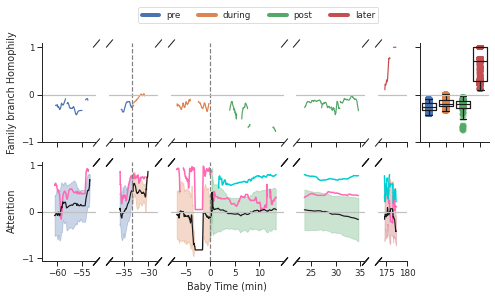

In [100]:
series = df_long_all["assort_family"]
series2 = df_long_all["assort_family"]
times = df_long_all["timestamps_s_babyTime"] / 60

birth_start = -2000 / 60
birth_end = 0 
later = 5000 / 60

# Define a simple time-phase mapping
def time_phase_mapping(t):
    if t < birth_start :
        return "pre"
    elif birth_start <= t and t < birth_end:
        return "during"
    elif birth_end <= t and t < later:
        return "post"
    elif t >= later:
        return "later"


time_windows = np.array([
    [-3780.0, -3120.0],
    [-2280.0, -1680.0],
    [-480.0, 900.0],
    [1320.0, 2160.0],
    [10380.0, 10740.0],
]) / 60

ratios = calculate_window_widths(time_windows)
series = [series2, np.zeros_like(series2)]
ncols =  len(time_windows)+1
nrows = len(series)

fig, axs = plt.subplots(nrows, ncols, sharey="row", sharex="col", width_ratios=ratios+[ratios[3]], figsize=(8, 4))#, layout="constrained")
   
i = 0
plot_time_series_by_window(series[i], times, time_windows=time_windows, time_phase_mapping=time_phase_mapping, axs=axs[i,:-1])
plot_series_distribution(series[i], times, time_phase_mapping, ax=axs[i,-1])


plot_time_series_by_window(series_mom, series_ts / 60, time_windows=time_windows, colors=["hotpink"]*4, 
                           time_phase_mapping=time_phase_mapping, axs=axs[1,:-1], show_legend=False, lw=1.5)

plot_time_series_by_window(series_calf, series_ts / 60, time_windows=time_windows, colors=["darkturquoise"]*4, 
                           time_phase_mapping=time_phase_mapping, axs=axs[1,:-1], show_legend=False, lw=1.5)

plot_time_series_by_window(series_whales, series_ts / 60, time_windows=time_windows, colors=["k"]*4, 
                           time_phase_mapping=time_phase_mapping, axs=axs[1,:-1], show_legend=False)
    #plot_series_distribution(series[i], times, time_phase_mapping, ax=axs[i,-1])


plot_time_series_by_window_fill_between(series_whales, series_ts / 60, series_std, time_windows=time_windows, colors=None, 
                           time_phase_mapping=time_phase_mapping, axs=axs[1,:-1], show_legend=False)

for ax in axs.ravel():
    pass
    #ax.grid(zorder=-10)

#plot_time_series_by_window(df_long["n_whales"], times, time_windows=time_windows, time_phase_mapping=time_phase_mapping, axs=axs[1,:-1], alpha=0.3)


axs[0,0].set_ylabel("Family branch Homophily")
#axs[1,0].set_yticks([0, 0.5, 1])
axs[0,0].set_yticks([-1, 0, 1])

axs[1,0].set_ylabel("Attention")
axs[1,0].set_yticks([-1, 0, 1])


axs[-1,2].set_xticks([-5, 0, 5, 10])
axs[-1,4].set_xticks([175, 180])

axs[-1,2].set_xlabel("Baby Time (min)")

for ax in axs[:,2]:
    ax.axvline(x=birth_end, c="grey", ls="--")
for ax in axs[:,1]:
    ax.axvline(x=birth_start, c="grey", ls="--")
for ax in axs[:,-1]:
    sb.despine(ax=ax)
for ax in axs[0,:]:
    ax.axhline(y=0, c="silver", ls="-")

for ax in axs[1,:-1]:
    ax.axhline(y=0, c="silver", ls="-")
    
axs[-1,-1].set_xticks(axs[-1,-1].get_xticks(), axs[-1,-1].get_xticklabels(), rotation=45, ha='center')

for axi in axs[:, :-1].ravel():
    spine_names = ('top','right')
    for spine_name in spine_names:
        axi.spines[spine_name].set_visible(False)

axs[-1, -1].remove()

fig_name = f"fig_3_v4"
plt.savefig(f"{results_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", facecolor="w")

plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. during: t-test independent samples, P_val:0.000e+00 t=-6.987e+01
during vs. post: t-test independent samples, P_val:1.668e-87 t=1.997e+01
post vs. later: t-test independent samples, P_val:0.000e+00 t=-6.864e+01
pre vs. later: t-test independent samples, P_val:0.000e+00 t=-2.793e+02


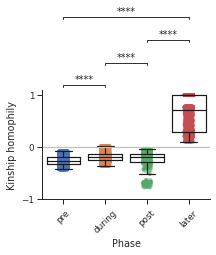

In [102]:
fig, ax = plt.subplots(figsize=(3, 2))


test_pairs = [("pre", "during"), ("during", "post"), ("post", "later"), ("pre", "later")]#, ("pre", "post")]
test = "t-test_ind" #"Mann-Whitney" #"t-test_welc"

i = 0
plot_series_distribution(
    series[i],
    times,
    time_phase_mapping,
    ax=ax,
    show_tests=True,
    test_pairs=test_pairs,
    test=test,
)

ax.axhline(y=0, c="silver", ls="-")

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='center')
ax.set_yticks([-1, 0, 1])
ax.set_ylabel("Kinship homophily")

sb.despine()

fig_name = f"fig_s3_stats"
plt.savefig(f"{results_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", facecolor="w")


In [47]:
import pingouin as pg

In [66]:
data = pd.DataFrame({
        'Time': times,
        'Value': series[0],
        'Phase': [time_phase_mapping(t) for t in times]
    })

data = data.dropna()

In [77]:
pg.pairwise_tests(data=data, dv="Value", between="Phase", effsize="cohen", parametric=False, padjust="bonf")

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,cohen
0,Phase,during,later,False,False,0.0,two-sided,0.000000e+00,0.000000e+00,bonf,-5.351645
1,Phase,during,post,False,False,2819862.0,two-sided,1.172022e-19,7.032131e-19,bonf,0.832035
2,Phase,during,pre,False,False,110648383.0,two-sided,0.000000e+00,0.000000e+00,bonf,0.780751
3,Phase,later,post,False,False,845080.0,two-sided,1.508913e-217,9.053480e-217,bonf,2.934349
4,Phase,later,pre,False,False,30304112.0,two-sided,0.000000e+00,0.000000e+00,bonf,5.907174
5,Phase,post,pre,False,False,2625970.0,two-sided,2.176404e-02,1.305843e-01,bonf,-0.047963


In [73]:
dist_1 = data[data["Phase"]=="pre"]["Value"]
dist_2 = data[data["Phase"]=="post"]["Value"]

pg.compute_effsize(dist_1, dist_2, eftype="eta-square")

0.000574790402547537

In [64]:
pg.normality(data=data, dv="Value", group="Phase")

/home/lucasm/.pyenv/versions/3.9.19/envs/venv_ceti/lib/python3.9/site-packages/pingouin/distribution.py:221: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13268.
  stats = pd.DataFrame(func(data)).T
/home/lucasm/.pyenv/versions/3.9.19/envs/venv_ceti/lib/python3.9/site-packages/pingouin/distribution.py:221: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11941.
  stats = pd.DataFrame(func(data)).T


,W,pval,normal
Phase,,,
pre,0.960834,2.454947e-50,False
during,0.970723,1.118095e-43,False
post,0.844793,1.198544e-18,False
later,0.774703,1.590285e-48,False


In [35]:
import pickle 

segmentations = {}

for vid_number in vid_numbers:

    file_name = f"../data/{vid_number}_cleaned_with_masks.pkl"
    with open(file_name, "rb") as fp:
        segmentation = pickle.load(fp)

        segmentations[vid_number] = segmentation

10
10


<Axes: >

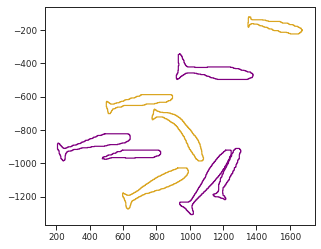

In [36]:
fig, ax = plt.subplots()
map_family_to_color = {"left" : "purple", "right" : "goldenrod", None : "silver"}
frame = 3000
vid_number = "1688827660979" #"1688829193016"
seg = segmentations[vid_number]
colors = [ map_family_to_color[family_membership[i]]for i in seg["ids"]]
print(len(seg["ids"] ))
print(len(colors))
# adj_contact = adjacency_matrices[vid_number]
plot_masks(seg, frame, colors=colors, zorder=-1, ax=ax, show_labels=False)

10
10


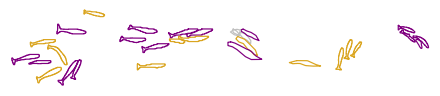

In [37]:
fig, axs_top = plt.subplots(1, 4, figsize=(6, 3), sharex=False, layout="constrained")
map_family_to_color = {"left" : "purple", "right" : "goldenrod", None : "silver"}

ax = axs_top[0]
# frame = 1000
# vid_number = "1688829193016"
frame = 3000
vid_number = "1688827660979" #"1688829193016"
seg = segmentations[vid_number]
colors = [ map_family_to_color[family_membership[i]]for i in seg["ids"]]
print(len(seg["ids"] ))
print(len(colors))
# adj_contact = adjacency_matrices[vid_number]
plot_masks(seg, frame, colors=colors, zorder=-1, ax=ax, show_labels=False)
# plot_graphx(adj_contact[frame], seg, frame, center_type="masks", edge_color="C0", zorder=2, ax=ax)

ax = axs_top[1]
frame = 50
vid_number = "1688830733272"
seg = segmentations[vid_number]
colors = [ map_family_to_color[family_membership[i]]for i in seg["ids"]]
# adj_contact = adjacency_matrices[vid_number]
plot_masks(seg, frame, colors=colors, zorder=-1, ax=ax, show_labels=False)
# plot_graphx(adj_contact[frame], seg, frame, center_type="masks", edge_color="C1", zorder=2, ax=ax)

ax = axs_top[2]
frame = 50
vid_number = "1688831374924"
seg = segmentations[vid_number]
colors = [ map_family_to_color[family_membership[i]]for i in seg["ids"]]
# adj_contact = adjacency_matrices[vid_number]
plot_masks(seg, frame, zorder=-1, ax=ax, show_labels=False, colors=colors)
# plot_graphx(adj_contact[frame], seg, frame, center_type="masks", edge_color="C2", zorder=2, ax=ax)

ax = axs_top[3]
frame = 30
vid_number = "1688841618482_2"
seg = segmentations[vid_number]
colors = [ map_family_to_color[family_membership[i]]for i in seg["ids"]]
# adj_contact = adjacency_matrices[vid_number]
plot_masks(seg, frame, colors=colors, zorder=-1, ax=ax, show_labels=False)
# plot_graphx(adj_contact[frame], seg, frame, center_type="masks", edge_color="C3", zorder=2, ax=ax)

for ax in axs_top:
    ax.set_yticks([])
    ax.set_xticks([])

sb.despine(left=True, bottom=True)


fig_name = f"fig_3_insets"
plt.savefig(f"{results_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", facecolor="w")


In [104]:
2+2

4

In [25]:
window_goal = 320

In [26]:
vid_number = "1688831374924"

In [29]:
seg = segmentations[vid_number]
ids = seg["ids"]
seg_freq = seg["segmentation_frequency"]

#adj_dist_avg = adj_mask_dist_avg[vid_number].copy()
adj_dist_time = adjacencies_mask_dist[vid_number].copy()

# keep only identified named whales
named_ids_mask = np.array([True if i in all_named_whales else False for i in ids ])
named_ids = list(np.array(ids)[named_ids_mask])
print(f"# ids : {len(named_ids)}")


# check for problematic videos
if len(named_ids_mask)!= adj_dist_time.shape[1]:
    print(f"non matching shapes because duplicate names")
    assortivities_age[vid_number] = np.nan
    assortivities_family[vid_number] = np.nan  
    #continue

if len(named_ids)==0:
    assortivities_age[vid_number] = np.nan
    assortivities_family[vid_number] = np.nan  
    print(f"no identified whales")
    #continue    

# keep only identified named whales
adj_dist_time = adj_dist_time[:, :,named_ids_mask][:, named_ids_mask,:]

# whale labels
labels_family = [None if i not in seg["ids"] else family_membership[i] for i in named_ids]
labels_age = [None if i not in seg["ids"] else age_membership[i] for i in named_ids]

# define distance threshold based on all times in a video
threshold = whale_sizes[vid_number]["max"] * 0.6 # np.nanpercentile(adj_dist_time, 90)
print(f"threshold: {threshold:.2f}")

# prepare variables to store results
assorts_family = np.zeros(seg["num_frames"])
assorts_age = np.zeros(seg["num_frames"])

assorts_age_shuffled = [] #np.zeros(seg["num_frames"]) #[]
assorts_family_shuffled = [] #np.zeros(seg["num_frames"]) #[]

# compute window for smoothing
window = compute_window(seg, window_goal)

print(f"# frames: {seg['num_frames']}")
print(f"size window: {window}")
print(f"# frames to shuffle: {seg['num_frames'] / window}")


if vid_number=="1688828965144": # many frames segmented, too slow
    print("== SKIP ==")
    #continue 

print("passed check 1")

if vid_number=="1688832995052": # many frames segmented, too slow
    print("== SKIP ==")
    #continue

print("passed check 2")
print(vid_number)
print(seg["num_frames"], type(seg["num_frames"]), range(seg["num_frames"]))

for t in tqdm(range(seg["num_frames"])):

    print(t, "in loop")

    adj_dist = adj_dist_time[t] # distance matrix from mask distance
    mapping = {i: named_ids[i] for i in range(len(named_ids))} # node name mapping

    print("mapped")
    
    G_t = build_net_from_mask_dist(adj_dist, threshold, mapping)

    print("network built")
          
    # assign attributes to the nodes
    
    
    ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G_t, ages, 'age')
    
    families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
    nx.set_node_attributes(G_t, families, 'family')

    d = 3/ 0

    #if t==0:
    #    print(f"# shuffles / frame : {num_attribute_shufflings(G_t, 'family')}")
    
    # purely for visualisation
    #G_t.remove_nodes_from(list(nx.isolates(G_t)))
    
    #colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G_t.nodes}
    #colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G_t.nodes}
    
    # compute assortativity
    assort_family = nx_adjusted_assortativity(G_t, "family")
    assort_age = nx_adjusted_assortativity(G_t, "age")

    assorts_family[t] = assort_family
    assorts_age[t] = assort_age

    

    if t % window == 0:  # look at one point every window points, otherwise too long
        # compute null model by shuffling labels
        assort_age_shuffled = [9, 3] #compute_shuffled_assortativity(G_t, "age")
        assort_family_shuffled = [9, 3] #compute_shuffled_assortativity(G_t, "family")

        assorts_family_shuffled.append(assort_family_shuffled)
        assorts_age_shuffled.append(assort_age_shuffled)
    else: 
        
        assorts_family_shuffled.append([np.nan])
        assorts_age_shuffled.append([np.nan])

    
        
print(len(assorts_family_shuffled))

    #print(t)
    #print(f"age: {assort_age:.2f}")
    #print(f"family: {assort_family:.2f}")

# smooth with rolling mean
assorts_age = pd.Series(assorts_age).rolling(window=window).mean()
assorts_family = pd.Series(assorts_family).rolling(window=window).mean()

assortivities_age[vid_number] = assorts_age    
assortivities_family[vid_number] = assorts_family   

assortivities_age_shuffled[vid_number] = assorts_age_shuffled  
assortivities_family_shuffled[vid_number] = assorts_family_shuffled

# ids : 18
threshold: 497.28
most frequent sampling freq 40
# frames: 179
size window: 8
# frames to shuffle: 22.375
passed check 1
passed check 2
1688831374924
179 <class 'numpy.int64'> range(0, 179)


  0%|          | 0/179 [00:00<?, ?it/s]

0 in loop
mapped
network built


ZeroDivisionError: division by zero

In [ ]:
def num_attribute_shufflings(G, attribute):
    # Get the original attribute values
    
    
    # Get all permutations of the attribute values
    permutations = itertools.permutations(original_values)
    permutations = list(set(list(permutations)))

    return len(permutations)
    

In [38]:
G_t.nodes

NodeView(('Snow', 'Rounder', 'Soursop', 'Accra', 'Newborn', 'YOY', 'Fruit Salad', 'Lady Oracle', 'Aurora', 'Atwood', 'Ariel', 'Allan'))

In [30]:
original_values = [G_t.nodes[node]["family"] for node in G_t.nodes()]
original_values

['right',
 'left',
 'right',
 'left',
 'left',
 'right',
 'right',
 'left',
 'left',
 'left',
 'right',
 'left']

In [31]:
permutations = itertools.permutations(original_values)


In [ ]:
permutations = list(set(list(permutations)))

In [ ]:
num_attribute_shufflings(G_t, 'family')

In [ ]:
list(permutations)

In [25]:
vid_numbers


['1688827433752',
 '1688827660979',
 '1688827887072',
 '1688828965144',
 '1688829151574',
 '1688829193016',
 '1688830733272',
 '1688830960531',
 '1688831187858',
 '1688831228731',
 '1688831374924',
 '1688831602631',
 '1688831830406',
 '1688832540499',
 '1688832767759',
 '1688832995052',
 '1688841618482_1',
 '1688841618482_2']

### check single shuffling result

In [ ]:
vid_number = "1688841618482_1"

dff = pd.DataFrame(assortivities_family_shuffled[vid_number])

#dff.melt()
dff = dff.reset_index().rename(columns={"index": "frame"})
dff = dff.melt(id_vars="frame", var_name="shuffle", value_name="assort")

dff = dff.dropna().reset_index()
dff

In [ ]:

fig, ax = plt.subplots()

ax.plot(assortivities_age[vid_number], label="assort age")
ax.plot(assortivities_family[vid_number], label="assort family")

sb.lineplot(data=dff, x="frame", y="assort")

ax.axhline(0, c="silver", ls="--", zorder=-2)

ax.legend()

In [ ]:
assortivities_family_shuffled.keys()

### Format shuffling results

In [26]:
df_summary_shuffled = pd.DataFrame()

for vid_number in vid_numbers:

    print(vid_number)

    if vid_number=="1688828965144": # many frames segmented, too slow
        print("== SKIP ==")
        continue 

    if vid_number=="1688832995052": # many frames segmented, too slow
        print("== SKIP ==")
        continue

    if vid_number=="1688831374924": # many frames segmented, too slow
        print("== SKIP ==")
        continue

    #if vid_number=="1688830960531":
        #print("== SKIP ==")
        #continue
    
    #if isinstance(assortivities_age[vid_number], float) and np.isnan(assortivities_age[vid_number]):
    #    print(vid_number)
    #    continue
    df_vid = pd.DataFrame(assortivities_family_shuffled[vid_number])
    
    #dff.melt()
    df_vid = df_vid.reset_index().rename(columns={"index": "frame"})
    df_vid = df_vid.melt(id_vars="frame", var_name="shuffle", value_name="assort")
    
    df_vid = df_vid.dropna().reset_index()
    df_vid["vid_number"] = vid_number

    df_vid = df_vid[["vid_number", "frame", "shuffle", "assort"]]

    df_summary_shuffled = pd.concat([df_summary_shuffled, df_vid])

df_summary_shuffled = df_summary_shuffled.sort_values(by=["vid_number", "frame", "shuffle"])
df_summary_shuffled = df_summary_shuffled.reset_index(drop=True)


1688827433752
1688827660979
1688827887072
1688828965144
== SKIP ==
1688829151574
1688829193016
1688830733272
1688830960531
1688831187858
1688831228731
1688831374924
== SKIP ==
1688831602631
1688831830406
1688832540499
1688832767759
1688832995052
== SKIP ==
1688841618482_1
1688841618482_2


In [27]:
df_summary_shuffled

,vid_number,frame,shuffle,assort
0,1688827433752,0,0,-0.157895
1,1688827433752,0,1,-0.055556
2,1688827433752,0,2,-0.170868
3,1688827433752,0,3,-0.112195
4,1688827433752,0,4,-0.161111
...,...,...,...,...
49353,1688841618482_2,960,121,-0.555556
49354,1688841618482_2,960,122,-0.238095
49355,1688841618482_2,960,123,-0.329670
49356,1688841618482_2,960,124,-0.329670


<Axes: xlabel='frame', ylabel='assort'>

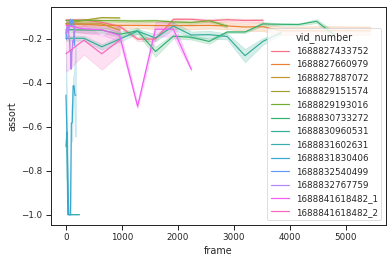

In [28]:
sb.lineplot(data=df_summary_shuffled, x="frame", y="assort", hue="vid_number")

### Format assortativities for plotting

In [29]:
df_long = pd.DataFrame({k: pd.Series(v) for k, v in assortivities_family.items()})
df_long = df_long.reset_index().melt(id_vars="index")
df_long.columns = ["frame", "vid_number", "assort_family"]

df_age = pd.DataFrame({k: pd.Series(v) for k, v in assortivities_age.items()})
df_age = df_age.reset_index().melt(id_vars="index")
df_age.columns = ["frame", "vid_number", "assort_age"]

df_long["assort_age"] = df_age["assort_age"]
#df_long = df_long.dropna()
df_long

,frame,vid_number,assort_family,assort_age
0,0,1688827433752,NaN,NaN
1,1,1688827433752,NaN,NaN
2,2,1688827433752,NaN,NaN
3,3,1688827433752,NaN,NaN
4,4,1688827433752,NaN,NaN
...,...,...,...,...
90027,5622,1688841618482_2,NaN,NaN
90028,5623,1688841618482_2,NaN,NaN
90029,5624,1688841618482_2,NaN,NaN
90030,5625,1688841618482_2,NaN,NaN


In [30]:
# add times in baby epochs

df_long_all = pd.merge(
    df_long,
    df_timestamps_s_babyTime_long,
    left_on=["vid_number", "frame"],
    right_on=["vid_number", "frame"],
)

df_long_all_shuffled = pd.merge(
    df_summary_shuffled,
    df_timestamps_s_babyTime_long,
    left_on=["vid_number", "frame"],
    right_on=["vid_number", "frame"],
)

In [31]:
# assign periods
df_long_all["when"] = df_long_all["timestamps_s_babyTime"].apply(assign_birth_regions)
df_long_all_shuffled["when"] = df_long_all_shuffled["timestamps_s_babyTime"].apply(assign_birth_regions)

df_long_all

,frame,vid_number,assort_family,assort_age,timestamps_s_babyTime,when
0,0,1688827433752,NaN,NaN,-3623.69641,pre
1,1,1688827433752,NaN,NaN,-3623.66341,pre
2,2,1688827433752,NaN,NaN,-3623.62941,pre
3,3,1688827433752,NaN,NaN,-3623.59541,pre
4,4,1688827433752,NaN,NaN,-3623.56341,pre
...,...,...,...,...,...,...
90027,5622,1688841618482_2,NaN,NaN,NaN,None
90028,5623,1688841618482_2,NaN,NaN,NaN,None
90029,5624,1688841618482_2,NaN,NaN,NaN,None
90030,5625,1688841618482_2,NaN,NaN,NaN,None


<Axes: xlabel='timestamps_s_babyTime', ylabel='assort_family'>

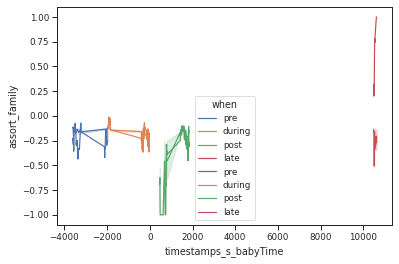

In [32]:
sb.lineplot(data=df_long_all, x="timestamps_s_babyTime", y="assort_family", hue="when")
#sb.lineplot(data=df_long_all, x="timestamps_s_babyTime", y="assort_age")

sb.lineplot(data=df_long_all_shuffled, x="timestamps_s_babyTime", y="assort", hue="when")


### Plot summary

In [33]:
df_long_all["timestamps_s_babyTime"] /= 60 # convert to minutes

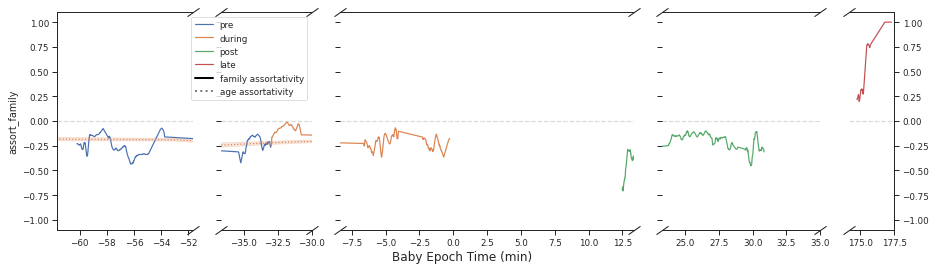

In [35]:

xlims = [(-3700, -3100), (-2200, -1800), (-500, 800), (1400, 2100), (10450, 10650)]

xlims = [(u/60, v/60) for u,v in xlims]

deltas = np.diff(xlims).flatten()
i_min = np.argmin(deltas)

ratios = [delta / deltas[i_min] for delta in deltas]

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 4), width_ratios=ratios)
n_plots = len(xlims)

for i in range(n_plots):

    ax = axs[i]
    sb.lineplot(data=df_long_all, y="assort_family", x="timestamps_s_babyTime", hue="when", ax=ax, legend=i==1, ls="-")
    #sb.lineplot(data=df_long_all, y="assort_age", x="timestamps_s_babyTime", hue="when", ax=ax, legend=False, ls="--", alpha=0.5)

    sb.lineplot(data=df_long_all_shuffled, x="timestamps_s_babyTime", y="assort", hue="when", ax=ax, legend=False, ls=":")

    

    ax.set_xlim(xlims[i])
    ax.set_xlabel("")
    sb.despine(ax=ax, left=i!=0, top=False, right=i!=n_plots-1)

    ax.axhline(0, c="silver", zorder=-2, alpha=0.6, ls="--")

d = .7  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
for i in range(n_plots-1):
    axs[i].plot([1, 1], [0, 1], transform=axs[i].transAxes, **kwargs)
for i in range(1,n_plots):
    axs[i].plot([0, 0], [0, 1], transform=axs[i].transAxes, **kwargs)


extra_lines = [
    Line2D([0], [0], color='black', lw=2, linestyle='-'),   # Black solid line
    Line2D([0], [0], color='black', lw=2, linestyle=':', alpha=0.5)   # Black dashed line
]

# Get current legend handles and labels
handles, labels = axs[1].get_legend_handles_labels()

# Add new handles and labels for the custom lines
handles.extend(extra_lines)
labels.extend(['family assortativity', 'age assortativity'])

# Update the legend with both existing and new entries
axs[1].legend(handles=handles, labels=labels)


fig.supxlabel("Baby Epoch Time (min)")

fig_name = f"assortativities_over_time_broken"
plt.savefig(f"{results_dir}{fig_name}.png", dpi=250, bbox_inches="tight", facecolor="w")
plt.savefig(f"{results_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", facecolor="w")

plt.show()


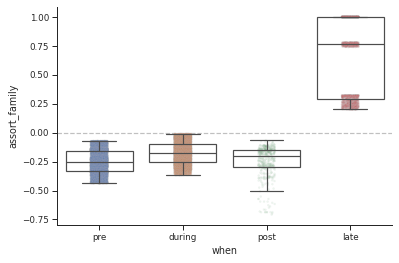

In [52]:
fig, ax = plt.subplots()#figsize=(4, 3))

sb.boxplot(data=df_long_all, y="assort_family", x="when", ax=ax, fliersize=0, boxprops=dict(facecolor='none'), zorder=2)
sb.stripplot(data=df_long_all, y="assort_family", x="when", ax=ax, alpha=0.1, size=2, linewidth=0.5, edgecolor="silver", zorder=-1)

#ax.legend_.remove() 
ax.axhline(0, c="silver", ls="--", zorder=-4)

sb.despine()

### plot single video

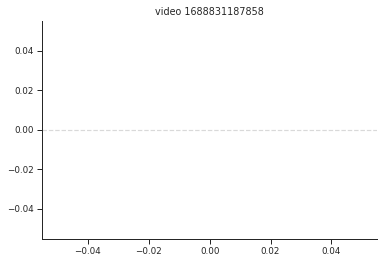

In [178]:
vid_number = "1688831187858"

mask = df_long_all["vid_number"]==vid_number
mask_shuffled = df_long_all_shuffled["vid_number"]==vid_number

fig, ax = plt.subplots()

sb.lineplot(data=df_long_all[mask], y="assort_family", x="timestamps_s_babyTime", hue="when", ax=ax, legend=i==1, ls="-")
#sb.lineplot(data=df_long_all, y="assort_age", x="timestamps_s_babyTime", hue="when", ax=ax, legend=False, ls="--", alpha=0.5)

#sb.lineplot(data=df_long_all_shuffled[mask_shuffled], x="timestamps_s_babyTime", y="assort", hue="when", ax=ax, legend=False, ls=":")

ax.set_xlabel("")
sb.despine()

ax.set_title(f"video {vid_number}")

ax.axhline(0, c="silver", zorder=-2, alpha=0.6, ls="--")

plt.show()

In [179]:
vid_numbers

['1688827433752',
 '1688827660979',
 '1688827887072',
 '1688828965144',
 '1688829151574',
 '1688829193016',
 '1688830733272',
 '1688830960531',
 '1688831187858',
 '1688831228731',
 '1688831374924',
 '1688831602631',
 '1688831830406',
 '1688832540499',
 '1688832767759',
 '1688832995052',
 '1688841618482_1',
 '1688841618482_2']

## Null model by shuffling labels

In [70]:




# Compute assortativity with all permutations
#assortativity_set = compute_shuffled_assortativity(G_t, "age")

In [76]:
%timeit assortativity_set = compute_shuffled_assortativity(G_t, "age")

573 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
len(assortativity_set)

120

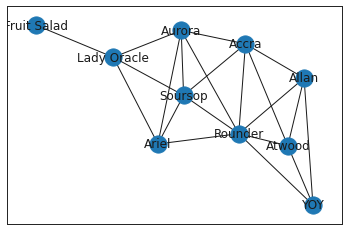

In [82]:
nx.draw_networkx(G_t)

age: -0.40
family: -0.23


Text(0.5, 0.98, 'vid 1688828965144')

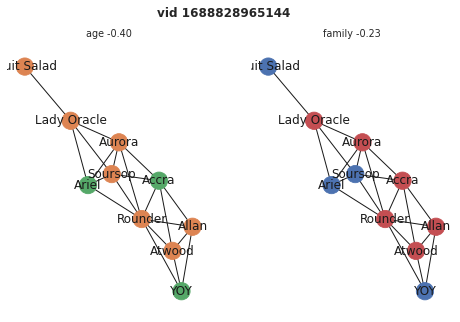

In [83]:
# create network from adj dist
G = G_t
# label nodes with names
mapping = {i: named_ids[i] for i in range(len(named_ids))}
G = nx.relabel_nodes(G, mapping)


# assign attributes to the nodes
ages = {named_ids[i]: labels_age[i] for i in range(len(named_ids))}
nx.set_node_attributes(G, ages, 'age')

families = {named_ids[i]: labels_family[i] for i in range(len(named_ids))}
nx.set_node_attributes(G, families, 'family')

# purely for visualisation
G.remove_nodes_from(list(nx.isolates(G)))

colors_family = {name: "r" if family=="left" else "b" for name, family in families.items() if name in G.nodes}
colors_age = {name: "C1" if age=="adult" else "C2" for name, age in ages.items() if name in G.nodes}


# compute assortativity
assort_family = nx.attribute_assortativity_coefficient(G, "family")
assort_age = nx.attribute_assortativity_coefficient(G, "age")
print(f"age: {assort_age:.2f}")
print(f"family: {assort_family:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

pos = nx.spring_layout(G)
nx.draw_networkx(G, node_color=colors_age.values(), ax=ax1, pos=pos)
sb.despine(bottom=True, left=True)
ax1.set_title(f"age {assort_age:.2f}")

nx.draw_networkx(G, node_color=colors_family.values(), ax=ax2, pos=pos)
sb.despine(bottom=True, left=True)
ax2.set_title(f"family {assort_family:.2f}")

plt.suptitle(f"vid {vid_number}", weight="bold")



## testing assortativity with and without removing nodes that have no label

In [46]:
import networkx as nx
import numpy as np

# Create a simple undirected graph G
G = nx.Graph()
# Add nodes and edges
G.add_edges_from([
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6),
    (6, 1), (1, 3), (2, 4), (3, 5), (4, 6)
])

# Assign 'family' attribute to a subset of nodes
for node in G.nodes:
    if node % 2 == 0:
        G.nodes[node]["family"] = "left"
    elif node % 3 == 0:
        G.nodes[node]["family"] = "right"

# 1. Compute assortativity with missing attribute values
assortativity_with_missing = nx.attribute_assortativity_coefficient(G, "family")
print("Assortativity with missing attribute values:", assortativity_with_missing)

# 2. Remove nodes without the 'family' attribute
G_filtered = G.subgraph([node for node in G if "family" in G.nodes[node]]).copy()

# Compute assortativity for the filtered graph
assortativity_filtered = nx.attribute_assortativity_coefficient(G_filtered, "family")
print("Assortativity after removing nodes without 'family' attribute:", assortativity_filtered)


Assortativity with missing attribute values: -0.2903225806451614
Assortativity after removing nodes without 'family' attribute: -0.3333333333333333


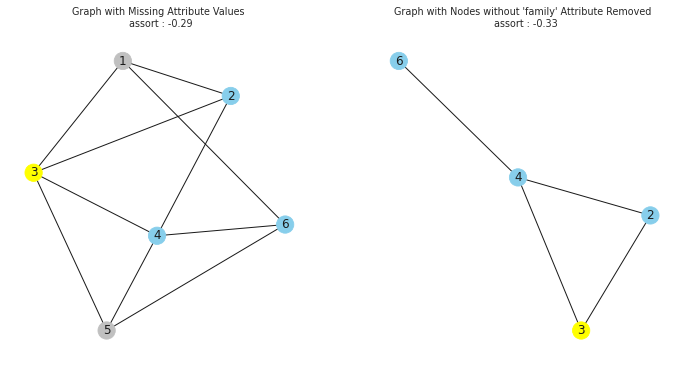

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple undirected graph G
G = nx.Graph()
G.add_edges_from([
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6),
    (6, 1), (1, 3), (2, 4), (3, 5), (4, 6)
])

# Assign 'family' attribute to a subset of nodes
for node in G.nodes:
    if node % 2 == 0:
        G.nodes[node]["family"] = "left"
    elif node % 3 == 0:
        G.nodes[node]["family"] = "right"

# Define colors for nodes based on the "family" attribute
def get_node_color(node):
    if G.nodes[node].get("family") == "left":
        return "skyblue"
    elif G.nodes[node].get("family") == "right":
        return "yellow"
    else:
        return "silver"  # for nodes without the "family" attribute

# Get node colors for the first case (with missing values)
node_colors_with_missing = [get_node_color(node) for node in G.nodes]

# Remove nodes without the 'family' attribute
G_filtered = G.subgraph([node for node in G if "family" in G.nodes[node]]).copy()


# 1. Compute assortativity with missing attribute values
assortativity_with_missing = nx.attribute_assortativity_coefficient(G, "family")
#print("Assortativity with missing attribute values:", assortativity_with_missing)

# Compute assortativity for the filtered graph
assortativity_filtered = nx.attribute_assortativity_coefficient(G_filtered, "family")
#print("Assortativity after removing nodes without 'family' attribute:", assortativity_filtered)




# Get node colors for the filtered graph
node_colors_filtered = [get_node_color(node) for node in G_filtered.nodes]

# Plot the two graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot graph with missing attribute values
nx.draw(G, pos=nx.spring_layout(G), node_color=node_colors_with_missing, with_labels=True, ax=ax1)
ax1.set_title(f"Graph with Missing Attribute Values \n assort : {assortativity_with_missing:.2f}")

# Plot graph with nodes without attributes removed
nx.draw(G_filtered, pos=nx.spring_layout(G_filtered), node_color=node_colors_filtered, with_labels=True, ax=ax2)
ax2.set_title(f"Graph with Nodes without 'family' Attribute Removed \n assort : {assortativity_filtered:.2f}")


plt.show()


In [69]:
nx_adjusted_assortativity(G_filtered, "family")

eline
[[0.0625 0.1875]
 [0.1875 0.5625]]


-0.6

In [337]:
whale_sizes

{'1688827433752': {'max': 670.6231657474392, 'avg': 477.4911836245151},
 '1688827660979': {'max': 659.2255435429183, 'avg': 463.73940220837926},
 '1688827887072': {'max': 482.4076960294553, 'avg': 303.1264738638421},
 '1688828965144': {'max': 698.9865567602873, 'avg': 396.16936815619977},
 '1688829151574': {'max': 406.5887728571456, 'avg': 259.7998702521712},
 '1688829193016': {'max': 505.52528118760114, 'avg': 283.7336984773535},
 '1688830733272': {'max': 415.8242081720774, 'avg': 257.1230124948257},
 '1688830960531': {'max': 415.73022296270943, 'avg': 109.98771812173139},
 '1688831187858': {'max': 405.74651511158356, 'avg': 112.32217003157602},
 '1688831228731': {'max': 1144.3888279596626, 'avg': 83.17867574675343},
 '1688831374924': {'max': 828.7972294835839, 'avg': 82.65140627565306},
 '1688831602631': {'max': 631.9135700795754, 'avg': 58.32027011879404},
 '1688831830406': {'max': 630.2170185720829, 'avg': 96.55111375822709},
 '1688832540499': {'max': 860.876908723562, 'avg': 214.1